In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week 6 data/bank.csv', sep = ';')

In [108]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [110]:
lis = []
cols = data.columns
for i in cols:
    if data[i].dtype == 'O':
        lis.append(i)

In [111]:
#The list of columns that has categorical values
print(lis)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [112]:
for i in lis:
    print(i.upper())
    print(data[i].value_counts())
    print('-'*100)
    print('-'*100)

JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MARITAL
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
----------------

In [113]:
outcome = data['y']

In [114]:
data.drop(['job','default','housing','loan','month','poutcome','contact','day','marital','education','y'], axis = 1, inplace = True)

In [115]:
data.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [116]:
outcome = pd.DataFrame(outcome, columns = ['y'])

In [117]:
outcome.head()

,y
0,no
1,no
2,no
3,no
4,no


In [118]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [119]:
dat = lb.fit_transform(outcome)

In [120]:
outcome = pd.DataFrame(dat, columns = ['y'])

In [121]:
outcome['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [122]:
mod_data = pd.concat([data, outcome], axis = 1)

In [123]:
mod_data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [124]:
mod_data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [125]:
data = pd.DataFrame(mod_data, columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'])

In [126]:
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [127]:
X_train, y_train, X_test, y_test = (data.iloc[:4000,:6], data.iloc[:4000,6:7], data.iloc[4000:,:6], data.iloc[4000:,6:7])




In [128]:
X_train.shape

(4000, 6)

In [129]:
X_train = X_train.T.values
y_train = y_train.T.values
X_test = X_test.T.values
y_test = y_test.T.values

# Implementing one layer neural network

In [130]:
def sigmoid(Z):
    A = 1 / (1 + (np.exp(-Z)))
    
    return A

In [131]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [132]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # forward propogation
    A = sigmoid(np.dot(w.T, X) + b) 
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    
    
    # backward propogation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)    
    
    grads = {
        'dw' : dw,
        'db' : db
    }
    
    return grads, cost

In [133]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs        

In [134]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate=0.5):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    params, grads, costs  = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
        
    d = {"costs": costs,
         "w" : w, 
         "b" : b}
    
    return d     

In [135]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 25000, learning_rate = 0.000002)



In [136]:
for i in d['costs']:
    print(i)

0.6931471805599454
0.6281330141735813
0.6116142845862065
0.6017828051888874
0.5965208746648061
0.5935998968841973
0.5915850179722757
0.5898977834090441
0.5883760484101117
0.5869780265497236
0.58568745079915
0.5844933242688873
0.5833863647509009
0.5823583580979015
0.5814019702146455
0.5805106368254853
0.5796784742090508
0.5789002016323131
0.5781710731574633
0.5774868176020536
0.5768435856813364
0.5762379034755786
0.5756666314553253
0.5751269283811655
0.574616219472965
0.5741321683159584
0.57367265203686
0.5732357393420334
0.5728196710619408
0.5724228428919862
0.5720437900600075
0.571681173685648
0.571333768627237
0.5710004526381758
0.570680196677682
0.5703720562405387
0.5700751635876402
0.5697887207739861
0.5695119933836429
0.5692443048923688
0.5689850315882934
0.5687335979894668
0.568489472704431
0.5682521646883497
0.5680212198528022
0.5677962179922151
0.5675767699941577
0.5673625153044466
0.5671531196212791
0.5669482727954783
0.5667476869164484
0.5665510945656699
0.5663582472215077
0.

0.423336636929914
0.42329816201693965
0.42325970703650917
0.4232212719764973
0.42318285682478685
0.42314446156926794
0.4231060861978388
0.4230677306984053
0.4230293950588813
0.4229910792671882
0.42295278331125513
0.4229145071790193
0.42287625085842534
0.42283801433742596
0.42279979760398134
0.42276160064605944
0.4227234234516362
0.42268526600869505
0.42264712830522727
0.42260901032923187
0.42257091206871555
0.4225328335116927
0.42249477464618546
0.42245673546022355
0.4224187159418449
0.42238071607909444
0.4223427358600254
0.42230477527269816
0.42226683430518125
0.42222891294555065
0.42219101118188995
0.42215312900229085
0.42211526639485203
0.42207742334768045
0.4220395998488905
0.42200179588660397
0.4219640114489509
0.42192624652406846
0.42188850110010157
0.4218507751652031
0.42181306870753293
0.4217753817152593
0.4217377141765576
0.42170006607961097
0.4216624374126101
0.4216248281637535
0.42158723832124706
0.4215496678733044
0.42151211680814665
0.4214745851140026
0.4214370727791087
0.

0.38830817101268483
0.3882869141929371
0.38826566713046284
0.38824442981977214
0.38822320225537854
0.38820198443179915
0.38818077634355463
0.3881595779851692
0.3881383893511708
0.38811721043609043
0.38809604123446334
0.38807488174082766
0.3880537319497254
0.3880325918557022
0.388011461453307
0.3879903407370923
0.38796922970161435
0.3879481283414326
0.3879270366511103
0.387905954625214
0.3878848822583142
0.3878638195449842
0.38784276647980154
0.38782172305734686
0.3878006892722044
0.38777966511896195
0.38775865059221076
0.3877376456865457
0.3877166503965648
0.38769566471687006
0.3876746886420667
0.38765372216676347
0.3876327652855727
0.38761181799311006
0.3875908802839948
0.3875699521528496
0.3875490335943008
0.387528124602978
0.3875072251735143
0.38748633530054644
0.38746545497871454
0.3874445842026621
0.38742372296703625
0.3874028712664875
0.38738202909566977
0.38736119644924044
0.3873403733218606
0.3873195597081946
0.38729875560291005
0.38727796100067835
0.38725717589617414
0.3872364

0.36021041400494563
0.3602010206949752
0.3601916309481426
0.360182244762783
0.36017286213723276
0.36016348306982876
0.3601541075589092
0.36014473560281296
0.36013536719988
0.36012600234845105
0.36011664104686797
0.3601072832934735
0.3600979290866112
0.36008857842462566
0.36007923130586234
0.3600698877286677
0.360060547691389
0.36005121119237465
0.3600418782299737
0.3600325488025364
0.3600232229084137
0.3600139005459577
0.3600045817135212
0.359995266409458
0.35998595463212296
0.3599766463798717
0.35996734165106076
0.35995804044404767
0.3599487427571909
0.3599394485888498
0.3599301579373846
0.3599208708011566
0.3599115871785277
0.35990230706786125
0.35989303046752086
0.3598837573758716
0.3598744877912792
0.35986522171211033
0.35985595913673263
0.35984670006351455
0.35983744449082555
0.3598281924170361
0.3598189438405173
0.3598096987596414
0.3598004571727815
0.3597912190783115
0.35978198447460646
0.359772753360042
0.3597635257329951
0.3597543015918431
0.35974508093496466
0.359735863760739

0.3460154152156312
0.346011013651981
0.346006613501143
0.34600221476257004
0.3459978174357151
0.3459934215200316
0.3459890270149732
0.34598463391999373
0.34598024223454726
0.34597585195808817
0.34597146309007115
0.34596707562995094
0.3459626895771828
0.3459583049312221
0.3459539216915244
0.34594953985754556
0.3459451594287418
0.34594078040456944
0.3459364027844852
0.34593202656794586
0.34592765175440865
0.3459232783433309
0.3459189063341704
0.345914535726385
0.3459101665194327
0.345905798712772
0.3459014323058616
0.3458970672981602
0.34589270368912733
0.34588834147822206
0.3458839806649041
0.3458796212486336
0.34587526322887036
0.345870906605075
0.34586655137670813
0.34586219754323066
0.3458578451041037
0.3458534940587888
0.3458491444067474
0.34584479614744157
0.3458404492803334
0.3458361038048852
0.34583175972055985
0.34582741702682
0.34582307572312904
0.34581873580895006
0.34581439728374697
0.34581006014698357
0.34580572439812396
0.3458013900366326
0.34579705706197406
0.3457927254736

0.3404364942776158
0.3404338036275785
0.3404311137615812
0.3404284246793526
0.340425736380622
0.34042304886511865
0.34042036213257176
0.3404176761827108
0.34041499101526534
0.34041230662996497
0.34040962302653965
0.34040694020471907
0.3404042581642333
0.3404015769048124
0.34039889642618654
0.3403962167280862
0.34039353781024173
0.34039085967238353
0.3403881823142425
0.34038550573554927
0.34038282993603475
0.3403801549154299
0.34037748067346596
0.3403748072098738
0.34037213452438503
0.34036946261673096
0.3403667914866433
0.3403641211338534
0.34036145155809316
0.3403587827590945
0.34035611473658933
0.34035344749030977
0.34035078101998795
0.3403481153253563
0.34034545040614705
0.3403427862620929
0.3403401228929264
0.3403374602983803
0.34033479847818743
0.3403321374320807
0.34032947715979334
0.3403268176610584
0.3403241589356092
0.34032150098317915
0.34031884380350175
0.34031618739631064
0.3403135317613395
0.3403108768983221
0.34030822280699263
0.34030556948708485
0.34030291693833303
0.340

0.3360710583065255
0.3360695794173472
0.336068100916426
0.3360666228036435
0.33606514507888113
0.3360636677420204
0.3360621907929431
0.3360607142315305
0.3360592380576646
0.3360577622712269
0.33605628687209943
0.3360548118601638
0.3360533372353018
0.33605186299739553
0.33605038914632673
0.3360489156819774
0.3360474426042297
0.3360459699129655
0.336044497608067
0.3360430256894163
0.3360415541568956
0.3360400830103872
0.33603861224977316
0.336037141874936
0.33603567188575795
0.33603420228212144
0.3360327330639089
0.33603126423100277
0.3360297957832856
0.33602832772063995
0.33602686004294846
0.3360253927500937
0.33602392584195834
0.33602245931842517
0.3360209931793769
0.33601952742469643
0.3360180620542665
0.33601659706797
0.3360151324656899
0.3360136682473093
0.33601220441271107
0.3360107409617783
0.336009277894394
0.33600781521044154
0.3360063529098038
0.33600489099236425
0.3360034294580061
0.3360019683066126
0.33600050753806715
0.33599904715225304
0.3359975871490538
0.3359961275283529


0.33390133831215146
0.33390040993021086
0.33389948177498513
0.33389855384641076
0.3338976261444241
0.3338966986689615
0.33389577141995963
0.33389484439735473
0.3338939176010835
0.3338929910310824
0.3338920646872879
0.3338911385696366
0.3338902126780652
0.33388928701251014
0.33388836157290813
0.3338874363591958
0.33388651137130987
0.33388558660918694
0.33388466207276374
0.33388373776197705
0.33388281367676353
0.33388188981705996
0.3338809661828033
0.3338800427739301
0.3338791195903773
0.3338781966320819
0.3338772738989804
0.33387635139101013
0.3338754291081077
0.33387450705021016
0.33387358521725446
0.33387266360917744
0.33387174222591626
0.33387082106740784
0.3338699001335893
0.33386897942439747
0.33386805893976973
0.33386713867964296
0.3338662186439543
0.333865298832641
0.33386437924564016
0.33386345988288885
0.3338625407443243
0.3338616218298838
0.3338607031395046
0.3338597846731238
0.33385886643067886
0.3338579484121069
0.33385703061734545
0.33385611304633167
0.33385519569900285
0.3

0.33277635459961236
0.3327756945299284
0.3327750346136502
0.332774374850737
0.3327737152411482
0.332773055784843
0.3327723964817808
0.3327717373319209
0.33277107833522257
0.33277041949164526
0.3327697608011483
0.33276910226369105
0.3327684438792329
0.33276778564773324
0.3327671275691515
0.33276646964344714
0.3327658118705796
0.3327651542505083
0.33276449678319264
0.3327638394685922
0.3327631823066664
0.3327625252973748
0.3327618684406769
0.3327612117365321
0.3327605551849001
0.33275989878574047
0.33275924253901257
0.3327585864446761
0.33275793050269065
0.3327572747130158
0.33275661907561116
0.33275596359043635
0.3327553082574509
0.33275465307661467
0.3327539980478872
0.3327533431712281
0.3327526884465971
0.332752033873954
0.3327513794532584
0.33275072518446996
0.33275007106754845
0.33274941710245376
0.3327487632891455
0.3327481096275834
0.3327474561177273
0.3327468027595371
0.3327461495529724
0.3327454964979932
0.33274484359455914
0.3327441908426301
0.3327435382421661
0.332742885793126

0.3315775162813386
0.33157712553930346
0.33157673488162276
0.3315763443082756
0.3315759538192412
0.3315755634144988
0.3315751730940276
0.33157478285780684
0.3315743927058158
0.3315740026380336
0.3315736126544397
0.3315732227550133
0.33157283293973355
0.33157244320857987
0.33157205356153135
0.33157166399856736
0.33157127451966734
0.33157088512481037
0.3315704958139758
0.331570106587143
0.3315697174442912
0.3315693283853998
0.33156893941044807
0.3315685505194154
0.33156816171228104
0.33156777298902435
0.3315673843496246
0.33156699579406135
0.3315666073223137
0.3315662189343612
0.3315658306301832
0.331565442409759
0.331565054273068
0.3315646662200895
0.33156427825080315
0.331563890365188
0.33156350256322364
0.3315631148448896
0.33156272721016505
0.33156233965902954
0.33156195219146245
0.33156156480744325
0.3315611775069513
0.3315607902899661
0.3315604031564672
0.33156001610643376
0.3315596291398455
0.3315592422566817
0.33155885545692204
0.3315584687405458
0.33155808210753257
0.33155769555

0.33102096749302334
0.33102069402681383
0.3310204206166591
0.33102014726254575
0.33101987396446064
0.3310196007223906
0.3310193275363224
0.33101905440624285
0.3310187813321387
0.3310185083139968
0.3310182353518039
0.3310179624455469
0.3310176895952125
0.33101741680078756
0.3310171440622589
0.33101687137961333
0.3310165987528377
0.3310163261819189
0.33101605366684356
0.3310157812075987
0.3310155088041711
0.33101523645654757
0.33101496416471504
0.33101469192866023
0.3310144197483701
0.33101414762383147
0.3310138755550312
0.33101360354195614
0.3310133315845932
0.3310130596829291
0.33101278783695093
0.33101251604664544
0.3310122443119995
0.33101197263300003
0.33101170100963395
0.33101142944188805
0.3310111579297493
0.3310108864732046
0.33101061507224083
0.33101034372684485
0.3310100724370036
0.331009801202704
0.33100953002393296
0.3310092589006774
0.3310089878329242
0.33100871682066035
0.33100844586387274
0.33100817496254825
0.3310079041166739
0.3310076333262366
0.3310073625912234
0.331007

0.3306585578442258
0.33065835698817014
0.33065815617132227
0.3306579553936733
0.33065775465521424
0.33065755395593627
0.3306573532958303
0.3306571526748875
0.33065695209309887
0.3306567515504557
0.33065655104694874
0.33065635058256937
0.3306561501573085
0.33065594977115725
0.33065574942410675
0.3306555491161479
0.3306553488472721
0.33065514861747025
0.33065494842673343
0.33065474827505287
0.33065454816241946
0.3306543480888246
0.33065414805425913
0.3306539480587143
0.33065374810218107
0.33065354818465076
0.33065334830611426
0.3306531484665629
0.33065294866598766
0.3306527489043798
0.33065254918173015
0.3306523494980302
0.3306521498532708
0.33065195024744315
0.3306517506805385
0.3306515511525479
0.3306513516634624
0.33065115221327324
0.3306509528019716
0.33065075342954847
0.3306505540959951
0.33065035480130256
0.3306501555454622
0.3306499563284649
0.330649757150302
0.33064955801096463
0.3306493589104438
0.33064915984873083
0.33064896082581685
0.330648761841693
0.3306485628963504
0.33064

0.3306461445628478
0.3305646476977812
0.33064604341375003
0.3305644733389938
0.3306459423778158
0.33056429907302276
0.3306458414538928
0.33056412489920206
0.33064574064094615
0.3305639508169325
0.33064563993804585
0.33056377682567406
0.33064553934435426
0.3305636029249387
0.3306454388591154
0.33056342911428466
0.33064533848164546
0.33056325539331066
0.3306452382113239
0.3305630817616511
0.330645138047586
0.3305629082189717
0.33064503798991546
0.3305627347649653
0.33064493803783845
0.33056256139934875
0.33064483819091833
0.33056238812185923
0.33064473844875
0.3305622149322521
0.33064463881095657
0.33056204183029797
0.3306445392771845
0.3305618688157808
0.3306444398471009
0.330561695888496
0.33064434052039027
0.3305615230482484
0.33064424129675174
0.330561350294851
0.330644142175897
0.33056117762812404
0.3306440431575482
0.33056100504789315
0.33064394424143617
0.33056083255398894
0.33064384542729874
0.3305606601462459
0.3306437467148799
0.3305604878245017
0.33064364810392793
0.3305603155

0.330572920734545
0.3304122398979731
0.33057287482382725
0.33041212388994634
0.3305728289436332
0.3304120079218239
0.33057278309394295
0.33041189199358906
0.33057273727473635
0.33041177610522515
0.3305726914859938
0.33041166025671564
0.33057264572769507
0.330411544448044
0.3305725999998206
0.3304114286791934
0.3305725543023503
0.3304113129501474
0.33057250863526433
0.33041119726088947
0.330572462998543
0.3304110816114029
0.33057241739216636
0.33041096600167125
0.33057237181611454
0.33041085043167767
0.33057232627036787
0.33041073490140593
0.3305722807549065
0.3304106194108393
0.3305722352697107
0.33041050395996124
0.33057218981476066
0.3304103885487553
0.3305721443900367
0.3304102731772048
0.33057209899551904
0.3304101578452934
0.33057205363118797
0.3304100425530044
0.3305720082970237
0.3304099273003213
0.3305719629930068
0.3304098120872277
0.33057191771911737
0.3304096969137071
0.3305718724753358
0.3304095817797429
0.3305718272616425
0.3304094666853187
0.33057178207801774
0.3304093516

In [137]:
num_iterations = range(25000)

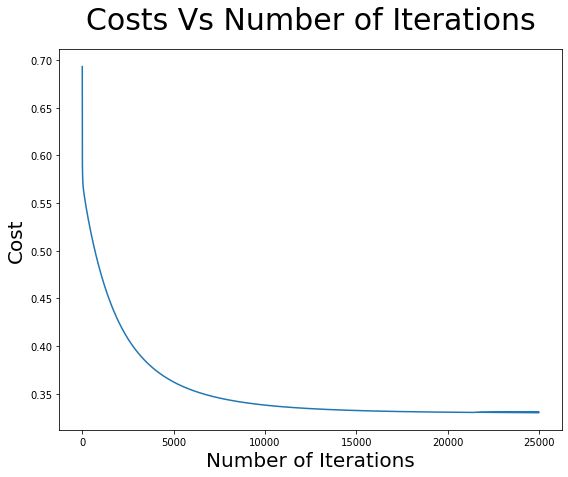

In [138]:
plt.figure(figsize = (9,7))
plt.plot(num_iterations, d['costs'])
plt.xlabel('Number of Iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.title('Costs Vs Number of Iterations', fontsize = 30, pad = 20)
plt.show()

In [139]:
w = d['w']
b = d['b']

In [140]:
def predict(w, b, test):
    val = sigmoid(np.dot(w.T, test) + b)
    pred = np.round(val)
    return pred

In [141]:
y_pred = predict(w,b,X_test)

In [142]:
y_pred = y_pred.astype('int')

In [143]:
def accuracy(y_test, y_pred):
    true = 0
    false = 0
    for i in range(len(y_test[0])):
        if y_test[0][i] == y_pred[0][i]:
            true += 1
        else:
            false += 1

    accuracy = true * 100 / (true + false)       
    return accuracy

In [144]:
accuracy(y_test, y_pred)

87.52399232245682